In [91]:
import pandas as pd
from matplotlib import pyplot as plt

In [92]:
df = pd.read_csv('summary.csv',sep='\t')
df.head()

dataset  model_name               model_parameters activation_func   
0   email  small_bert  bert_en_uncased_L-2_H-128_A-2         sigmoid  \
1   email  small_bert  bert_en_uncased_L-2_H-128_A-2         sigmoid   
2   email  small_bert  bert_en_uncased_L-2_H-128_A-2         sigmoid   
3   email  small_bert  bert_en_uncased_L-2_H-128_A-2         sigmoid   
4   email  small_bert  bert_en_uncased_L-2_H-128_A-2         sigmoid   

  optimization  epochs                 date  test_loss  test_accuracy   
0          SGD     1.0  2023-04-29_18-46-18   0.195679       0.920822  \
1          SGD     2.0  2023-04-29_18-46-18   0.243903       0.901949   
2          SGD     3.0  2023-04-29_18-46-18   0.146130       0.943072   
3          SGD     4.0  2023-04-29_18-46-18   0.168277       0.938008   
4          SGD     5.0  2023-04-29_18-46-18   0.138103       0.949363   

   test_precision  test_recall                     comments  training_loss   
0        0.895882     0.949501  trained with token_size 128       0.358273  \
1        0.978042     0.819202  trained with token_size 128       0.207870   
2        0.916838     0.972569  trained with token_size 128       0.161363   
3        0.971102     0.900873  trained with token_size 128       0.135647   
4        0.920760     0.981608  trained with token_size 128       0.115289   

   training_accuracy  training_precision  training_recall  training_duration   
0           0.836569            0.829375         0.841010         207.489241  \
1           0.919704            0.910977         0.927519         204.251216   
2           0.936661            0.928878         0.943574         203.454523   
3           0.948208            0.941407         0.954174         261.983891   
4           0.956188            0.950235         0.961344         208.107884   

   testing_duration  
0         41.685359  
1         24.878037  
2         23.839579  
3         23.873354  
4         23.719165

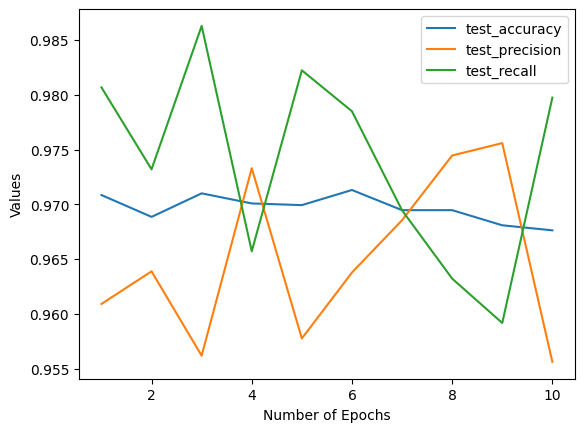

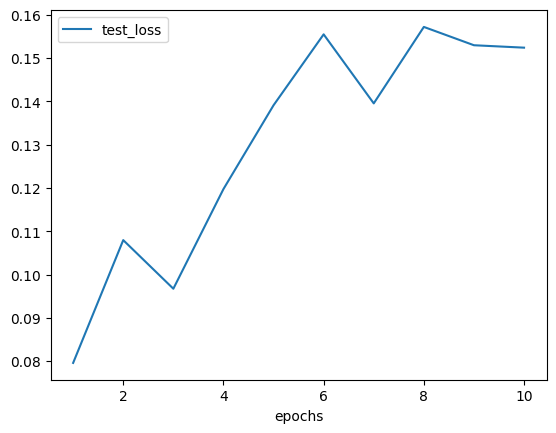

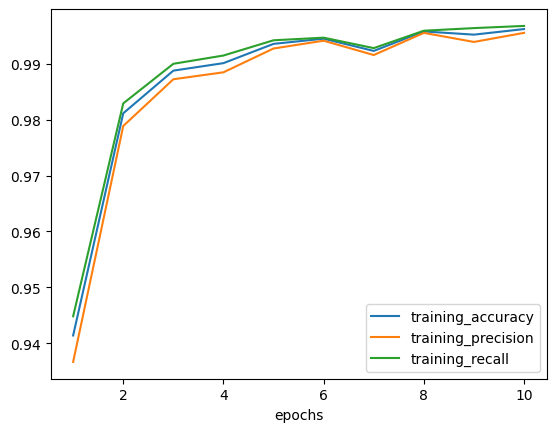

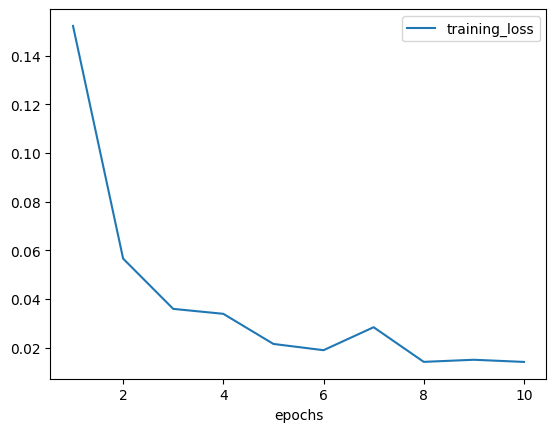

In [93]:
# plot how the metrics change with each epoch
# we have 10 epochs
# the dataset is email
# number of tokens is 128 (default)
# optimizer is adam (default)
# model name is small_bert
# parameters bert_en_uncased_L-2_H-128_A-2
# activation_func is sigmoid (default)

metrics_with_different_epochs = df[df.date == "2023-04-29_17-50-20"]
metrics_with_different_epochs

metrics_with_different_epochs.set_index('epochs', inplace=True)

# Plot the dataframe
y=metrics_with_different_epochs.columns[7:10].tolist() #loss missing

metrics_with_different_epochs.plot(y=y)

# Add labels and title
plt.xlabel('Number of Epochs')
plt.ylabel('Values')
# plt.title('Multiple Functions on Same Plot') add title with latex

# Show the plot
plt.show()

y=metrics_with_different_epochs.columns[6] #loss function
metrics_with_different_epochs.plot(y=y)

plt.show()

y=metrics_with_different_epochs.columns[12:15].tolist() # loss missing
metrics_with_different_epochs.plot(y=y)

plt.show()

y=metrics_with_different_epochs.columns[11] #loss function
metrics_with_different_epochs.plot(y=y)

plt.show()



In [94]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# Plot the dataframe
y = metrics_with_different_epochs.columns[7:10].tolist()  # loss missing
metrics_with_different_epochs.plot(y=y, ax=axs[0, 1])


y = metrics_with_different_epochs.columns[6]  # loss function
metrics_with_different_epochs.plot(y=y, ax=axs[1, 1], color='red')


y = metrics_with_different_epochs.columns[12:15].tolist()  # loss missing
metrics_with_different_epochs.plot(y=y, ax=axs[0, 0])


y = metrics_with_different_epochs.columns[11]  # loss function
metrics_with_different_epochs.plot(y=y, ax=axs[1, 0], color='red')

plt.subplots_adjust(wspace=0.15)

axs[0, 1].set_title('Testing')
axs[0, 1].set_xlabel('')
axs[1, 1].set_xlabel('')
axs[0, 0].set_title('Training')
axs[0, 0].set_xlabel('')
axs[1, 0].set_xlabel('')

fig.text(0.5, 0.04, 'Epochs', ha='center', va='center')
fig.text(0.06, 0.5, 'Values', ha='center',
         va='center', rotation='vertical')

plt.savefig("report/resources/epochs-results.pdf",
            format="pdf", bbox_inches="tight")

plt.show()


In [95]:
# plot how the metrics change with the token size
# token sizes from 2 to 256
# we have 10 epochs
# the dataset is email
# optimizer is adam (default)
# model name is small_bert
# parameters bert_en_uncased_L-2_H-128_A-2
# activation_func is sigmoid (default)

metrics_with_different_token_sizes = df[(
    df.date == '2023-04-29_11-28-10') & (df.epochs == 10)]
metrics_with_different_token_sizes

metrics_with_different_token_sizes['tokens'] = metrics_with_different_token_sizes['comments'].map(
    lambda x: x.split(sep=" ")[3])

metrics_with_different_token_sizes.set_index('tokens', inplace=True)

# Plot the dataframe
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first bar chart in the first subplot
y = metrics_with_different_token_sizes.columns[7:11].tolist()  # loss missing
metrics_with_different_token_sizes.plot(y=y, ax=axs[0])
axs[1].set_title('Training')
axs[1].set_ylabel('')
axs[1].set_xlabel('')

# Plot the second bar chart in the second subplot
y = metrics_with_different_token_sizes.columns[12:-2].tolist()  # loss missing
metrics_with_different_token_sizes.plot(y=y,ax=axs[1])
axs[0].set_title('Testing')
axs[0].set_ylabel('')
axs[0].set_xlabel('')


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.15)

# Set x and y labels for both subplots
fig.text(0.5, 0.04, 'Length of Tokens', ha='center', va='center')
fig.text(0.06, 0.5, 'Values', ha='center',
         va='center', rotation='vertical')






plt.savefig("report/resources/token-size-testing-training.pdf",
            format="pdf", bbox_inches="tight")
# plt.title('Multiple Functions on Same Plot') add title with latex

# Show the plot


# y = metrics_with_different_token_sizes.columns[7]  # loss function
# metrics_with_different_token_sizes.plot(y=y)

# plt.show()



#plt.savefig("report/resources/token-size-training-testing.pdf",
            #format="pdf", bbox_inches="tight")
plt.show()

# y = metrics_with_different_token_sizes.columns[12]  # loss function
# metrics_with_different_token_sizes.plot(y=y)

# plt.show()




/tmp/ipykernel_201548/4280593193.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_with_different_token_sizes['tokens'] = metrics_with_different_token_sizes['comments'].map(


In [96]:
metrics_with_different_token_sizes.iloc[4:,7:11]

test_loss  test_accuracy  test_precision  test_recall
tokens                                                       
16       0.194438       0.944760        0.958763     0.927681
32       0.158929       0.963173        0.962882     0.962282
64       0.188256       0.954273        0.948244     0.959476
128      0.182298       0.965475        0.975151     0.954177
256      0.136648       0.968237        0.966718     0.968828

In [97]:
# training and testing duration vs tokens
import matplotlib.pyplot as plt
tokens_duration = df[(df.date == '2023-04-29_11-28-10')]
tokens_duration = tokens_duration[[
    'comments', 'training_duration', 'testing_duration']]
tokens_duration['tokens'] = tokens_duration['comments'].map(
    lambda x: int(x.split(sep=" ")[3]))
tokens_duration.drop(['comments'], axis=1, inplace=True)
tokens_duration = tokens_duration.groupby(
    'tokens').sum().apply(lambda x: x/60)


# y = tokens_duration.columns[0]

# tokens_duration.plot.barh(y=y)

# # Add labels and title
# plt.ylabel('Length of Tokens')
# plt.xlabel('Duration in mins')
# plt.show()

# y = tokens_duration.columns[1]

# tokens_duration.plot.barh(y=y,color='orange')

# # Add labels and title
# plt.ylabel('Length of Tokens')
# plt.xlabel('Duration in mins')
# plt.show()


fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first bar chart in the first subplot
y = tokens_duration.columns[0]
tokens_duration.plot.barh(y=y, ax=axs[0], color='blue')
axs[0].set_title('Training')
axs[0].set_ylabel('')

# Plot the second bar chart in the second subplot
y = tokens_duration.columns[1]
tokens_duration.plot.barh(y=y, ax=axs[1], color='orange')
axs[1].set_title('Testing')
axs[1].set_ylabel('')


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.15)

# Set x and y labels for both subplots
fig.text(0.5, 0.04, 'Duration in mins', ha='center', va='center')
fig.text(0.06, 0.5, 'Length of Tokens', ha='center',
         va='center', rotation='vertical')

# Save and display the plot
plt.savefig("report/resources/token-size-time.pdf",
            format="pdf", bbox_inches="tight")
plt.show()


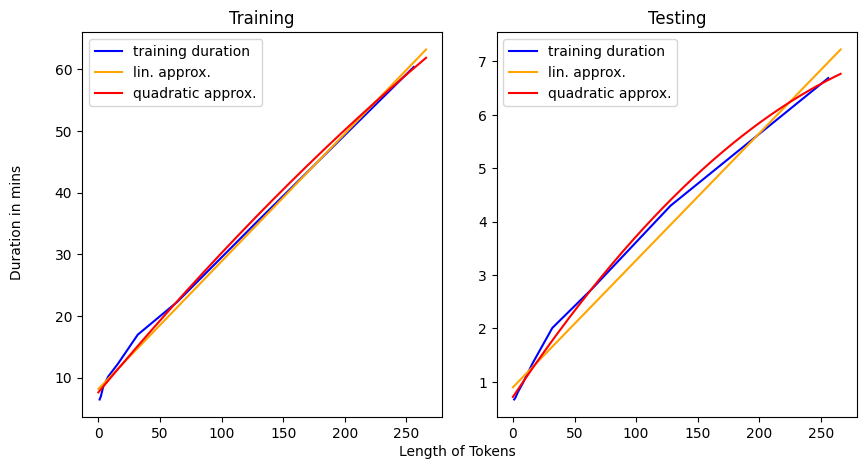

training_duration  testing_duration
tokens                                     
1                6.437679          0.669672
2                6.947119          0.700913
4                8.572112          0.806793
8               10.163206          0.974049
16              12.268472          1.349239
32              16.959946          2.009767
64              22.268006          2.736102
128             35.105525          4.298234
256             60.368384          6.687066

In [98]:
# training and testing duration vs tokens
import matplotlib.pyplot as plt
tokens_duration = df[(df.date == '2023-04-29_11-28-10')]
tokens_duration = tokens_duration[[
    'comments', 'training_duration', 'testing_duration']]
tokens_duration['tokens'] = tokens_duration['comments'].map(
    lambda x: int(x.split(sep=" ")[3]))
tokens_duration.drop(['comments'], axis=1, inplace=True)
tokens_duration = tokens_duration.groupby(
    'tokens').sum().apply(lambda x: x/60)


# y = tokens_duration.columns[0]

# tokens_duration.plot.barh(y=y)

# # Add labels and title
# plt.ylabel('Length of Tokens')
# plt.xlabel('Duration in mins')
# plt.show()

# y = tokens_duration.columns[1]

# tokens_duration.plot.barh(y=y,color='orange')

# # Add labels and title
# plt.ylabel('Length of Tokens')
# plt.xlabel('Duration in mins')
# plt.show()


fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first bar chart in the first subplot
y = tokens_duration.columns[0]
tokens_duration.plot(y=y, ax=axs[0], color='blue')
axs[0].set_title('Training')
axs[0].set_xlabel('')
#x = [1,2,4,8,16,32,64,128,256]
x = [x for x in range(267)]
y = [0.206957*x+8.148406 for x in x]
axs[0].plot(x,y,color='orange')
y = [-0.000133*x**2+0.239337*x+7.601002 for x in x]
axs[0].plot(x,y,color='red')
axs[0].legend(['training duration', 'lin. approx.','quadratic approx.'])

# Plot the second bar chart in the second subplot
y = tokens_duration.columns[1]
tokens_duration.plot(y=y, ax=axs[1], color='blue')
y = [0.023771*x+0.898326 for x in x]
axs[1].plot(x,y,color='orange')
y = [-0.000044*x**2+0.034441*x+0.717943 for x in x]
axs[1].plot(x,y,color='red')
axs[1].legend(['training duration', 'lin. approx.','quadratic approx.'])
axs[1].set_title('Testing')
axs[1].set_xlabel('')



# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.15)

# Set x and y labels for both subplots
fig.text(0.5, 0.04, 'Length of Tokens', ha='center', va='center')
fig.text(0.06, 0.5, 'Duration in mins', ha='center',
         va='center', rotation='vertical')

# Save and display the plot
plt.savefig("report/resources/token-size-time-curve.pdf",
            format="pdf", bbox_inches="tight")
plt.show()

tokens_duration


/tmp/ipykernel_201548/2872569480.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_with_different_batch_sizes['batches'] = metrics_with_different_batch_sizes['comments'].map(


Index(['dataset', 'model_name', 'model_parameters', 'activation_func',
       'optimization', 'epochs', 'date', 'test_loss', 'test_accuracy',
       'test_precision', 'test_recall', 'comments', 'training_loss',
       'training_accuracy', 'training_precision', 'training_recall',
       'training_duration', 'testing_duration', 'batches'],
      dtype='object')
          speed_Up
batches           
1         1.000000
2         1.533561
4         2.316786
8         3.215557
16        4.655371
32        6.141403
64        7.754513
128       9.570274
256      11.670243
512      12.668736
1024     13.573590
2048     14.990556
4096     15.260705


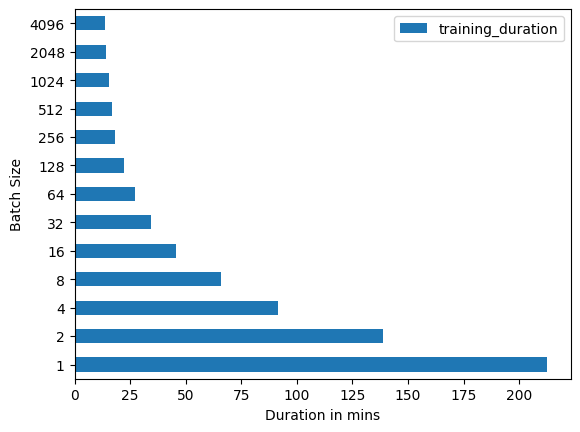

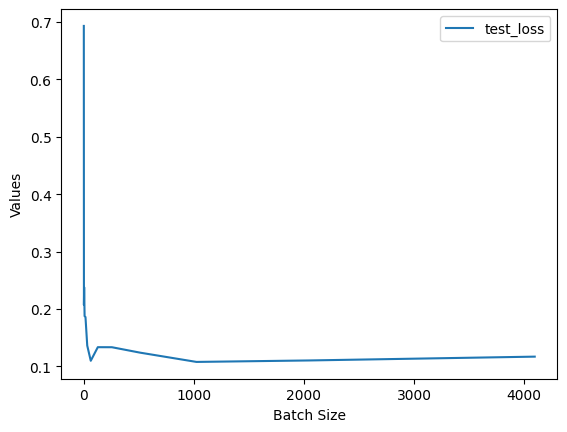

In [99]:
# plot how the metrics change with the batch sizes [1, 2, 4, 8, .. , 4096]
# token size 128 (default)
# we have 10 epochs (default)
# the dataset is email
# optimizer is adam (default)
# model name is small_bert
# parameters bert_en_uncased_L-2_H-128_A-2
# activation_func is sigmoid (default)

metrics_with_different_batch_sizes = df[(
    df.date == '2023-04-28_20-44-06')]  # & (df.epochs==10)]

metrics_with_different_batch_sizes['batches'] = metrics_with_different_batch_sizes['comments'].map(
    lambda x: int(x.split(sep=" ")[3]))

time_and_batch_size = metrics_with_different_batch_sizes[[
    'batches', 'training_duration', 'testing_duration']]
print(metrics_with_different_batch_sizes.columns)

# Plotting the time it takes to train each batch_size
time_and_batch_size = time_and_batch_size.groupby(
    'batches').sum().apply(lambda x: x/60)
#time_and_batch_size.to_csv("time_and_batch_size.csv")
speed_up = time_and_batch_size['training_duration'].apply(lambda x:time_and_batch_size['training_duration'].iloc[0]/x)
speed_up = pd.DataFrame(speed_up)
speed_up.rename(columns={'training_duration':'speed_Up'},inplace=True)
print(speed_up)
speed_up.to_csv("time_and_batch_size.csv")

# training
y = time_and_batch_size.columns[0]
time_and_batch_size.plot.barh(y=y)

# Add labels and title
plt.ylabel('Batch Size')
plt.xlabel('Duration in mins')
plt.savefig("report/resources/batch-size-training-time.pdf", format="pdf", bbox_inches="tight")
plt.show()

# testing
# y = time_and_batch_size.columns[1]
# time_and_batch_size.plot.barh(y=y)

# # Add labels and title
# plt.ylabel('Batch Size')
# plt.xlabel('Duration in mins')
# plt.show()


# metrics_with_different_batch_sizes

# Plot the dataframe
metrics_with_different_batch_sizes.set_index('batches', inplace=True)
metrics_with_different_batch_sizes = metrics_with_different_batch_sizes[
    metrics_with_different_batch_sizes.epochs == 10]
y = metrics_with_different_batch_sizes.columns[8:11].tolist()  # loss missing

metrics_with_different_batch_sizes.plot(y=y)

# Add labels and title
plt.xlabel('Batch Size')
plt.ylabel('Values')
plt.show()


y = metrics_with_different_batch_sizes.columns[7]  # test_loss

metrics_with_different_batch_sizes.plot(y=y)

# Add labels and title
plt.xlabel('Batch Size')
plt.ylabel('Values')
plt.show()


y = metrics_with_different_batch_sizes.columns[13:16].tolist()  # loss missing

metrics_with_different_batch_sizes.plot.bar(y=y)

# Add labels and title
plt.xlabel('Batch Size')
plt.ylabel('Values')
plt.show()


y = metrics_with_different_batch_sizes.columns[12]  # training_loss

metrics_with_different_batch_sizes.plot(y=y)

# Add labels and title
plt.xlabel('Batch Size')
plt.ylabel('Values')
plt.show()


In [100]:
# effect of optimizer (metrics)
different_optimizers = df[(df.date =="2023-04-29_18-46-18") | (df.date=="2023-04-29_16-50-06") | (df.date =="2023-04-29_17-50-20")]
different_optimizers = different_optimizers.iloc[:,4:]
different_optimizers_epochs = different_optimizers[different_optimizers.epochs==10]
different_optimizers_epochs


optimization  epochs                 date  test_loss  test_accuracy   
9            SGD    10.0  2023-04-29_18-46-18   0.137369       0.956422  \
200         adam    10.0  2023-04-29_17-50-20   0.152392       0.967623   
430        adamW    10.0  2023-04-29_16-50-06   0.221351       0.965321   

     test_precision  test_recall                     comments  training_loss   
9          0.935638     0.978803  trained with token_size 128       0.061981  \
200        0.955610     0.979738  trained with token_size 128       0.014206   
430        0.949638     0.981608  trained with token_size 128       0.010096   

     training_accuracy  training_precision  training_recall   
9             0.978209            0.974979         0.980906  \
200           0.996240            0.995563         0.996805   
430           0.996701            0.996185         0.997116   

     training_duration  testing_duration  
9           201.402699         24.201696  
200         207.523664         24.154949  
430         206.134153         41.002967

In [101]:
different_optimizers_epochs.set_index("optimization",inplace=True)
y = different_optimizers_epochs.columns[2:6]
different_optimizers_epochs.plot.bar(y=y).legend(loc='lower right')

# Add labels and title
plt.ylabel('values')
plt.xlabel('algorithm')
plt.savefig("report/resources/optimization-metrics.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [102]:
# effect of the optimizer (time)
different_optimizers_time = different_optimizers.iloc[:,[0,-2]]


different_optimizers_time.groupby('optimization').sum().apply(lambda x:x/60)



training_duration
optimization                   
SGD                   34.939045
adam                  34.290775
adamW                 34.893520

In [103]:
# effect of epoch size
different_epochs = df[df.date =="2023-04-29_17-50-20"].iloc[:,5:]
different_epochs.set_index('epochs',inplace=True)

avg_epochs_time = different_epochs.iloc[:,-2].mean()/60
avg_epochs_time

3.4290775266666667

In [104]:
# effect of trainable=False
reference_model = df[df.date =="2023-04-29_17-50-20"].iloc[:,5:]
#reference_model.set_index('epochs',inplace=True)

reference_model

epochs                 date  test_loss  test_accuracy  test_precision   
191     1.0  2023-04-29_17-50-20   0.079605       0.970845        0.960904  \
192     2.0  2023-04-29_17-50-20   0.107959       0.968851        0.963878   
193     3.0  2023-04-29_17-50-20   0.096736       0.970999        0.956180   
194     4.0  2023-04-29_17-50-20   0.119743       0.970078        0.973296   
195     5.0  2023-04-29_17-50-20   0.139096       0.969925        0.957751   
196     6.0  2023-04-29_17-50-20   0.155466       0.971306        0.963770   
197     7.0  2023-04-29_17-50-20   0.139528       0.969464        0.968546   
198     8.0  2023-04-29_17-50-20   0.157181       0.969464        0.974456   
199     9.0  2023-04-29_17-50-20   0.152951       0.968084        0.975587   
200    10.0  2023-04-29_17-50-20   0.152392       0.967623        0.955610   

     test_recall                     comments  training_loss   
191     0.980673  trained with token_size 128       0.152163  \
192     0.973192  trained with token_size 128       0.056629   
193     0.986284  trained with token_size 128       0.035986   
194     0.965711  trained with token_size 128       0.033952   
195     0.982232  trained with token_size 128       0.021588   
196     0.978491  trained with token_size 128       0.019022   
197     0.969451  trained with token_size 128       0.028451   
198     0.963217  trained with token_size 128       0.014231   
199     0.959165  trained with token_size 128       0.015093   
200     0.979738  trained with token_size 128       0.014206   

     training_accuracy  training_precision  training_recall   
191           0.941380            0.936645         0.944821  \
192           0.981163            0.978889         0.982932   
193           0.988798            0.987254         0.990024   
194           0.990140            0.988500         0.991505   
195           0.993593            0.992763         0.994233   
196           0.994514            0.994158         0.994700   
197           0.992327            0.991593         0.992830   
198           0.995818            0.995559         0.995947   
199           0.995243            0.993936         0.996415   
200           0.996240            0.995563         0.996805   

     training_duration  testing_duration  
191         210.413310         25.529167  
192         201.228505         24.023988  
193         204.156920         23.021891  
194         201.758909         25.068261  
195         207.605502         41.007554  
196         201.720139         23.797953  
197         205.924435         41.004806  
198         204.679990         24.041915  
199         212.435142         23.666714  
200         207.523664         24.154949

In [105]:
# trainable=False
non_trained_model = df[df.date =="2023-04-29_19-40-12"].iloc[:,5:]
#non_trained_model.set_index('epochs',inplace=True)
non_trained_model

epochs                 date  test_loss  test_accuracy  test_precision   
431     1.0  2023-04-29_19-40-12   0.543775       0.741599        0.737976  \
432     2.0  2023-04-29_19-40-12   0.500467       0.764462        0.789948   
433     3.0  2023-04-29_19-40-12   0.479146       0.782722        0.767622   
434     4.0  2023-04-29_19-40-12   0.464984       0.789781        0.781729   
435     5.0  2023-04-29_19-40-12   0.456001       0.796992        0.793157   
436     6.0  2023-04-29_19-40-12   0.450587       0.799601        0.809570   
437     7.0  2023-04-29_19-40-12   0.446142       0.800829        0.807272   
438     8.0  2023-04-29_19-40-12   0.443378       0.801135        0.796526   
439     9.0  2023-04-29_19-40-12   0.441322       0.800675        0.809200   
440    10.0  2023-04-29_19-40-12   0.445708       0.799601        0.762998   

     test_recall                                           comments   
431     0.736596  trained with token_size 128 training off for bert  \
432     0.710411  trained with token_size 128 training off for bert   
433     0.801122  trained with token_size 128 training off for bert   
434     0.794888  trained with token_size 128 training off for bert   
435     0.794888  trained with token_size 128 training off for bert   
436     0.775249  trained with token_size 128 training off for bert   
437     0.782107  trained with token_size 128 training off for bert   
438     0.800499  trained with token_size 128 training off for bert   
439     0.778678  trained with token_size 128 training off for bert   
440     0.860037  trained with token_size 128 training off for bert   

     training_loss  training_accuracy  training_precision  training_recall   
431       0.628119           0.642715            0.641013         0.623178  \
432       0.531573           0.734175            0.733428         0.722625   
433       0.503593           0.753510            0.754368         0.740316   
434       0.488470           0.763984            0.764557         0.752163   
435       0.479049           0.770391            0.768766         0.763074   
436       0.477844           0.771004            0.768887         0.764633   
437       0.472071           0.773920            0.772806         0.765880   
438       0.475854           0.773767            0.771751         0.767360   
439       0.468985           0.774841            0.772592         0.768919   
440       0.471389           0.771848            0.770640         0.763853   

     training_duration  testing_duration  
431         110.026743         25.141725  
432         108.527148         23.634330  
433         101.445086         23.749367  
434         101.482236         41.003508  
435         141.974705         23.700910  
436         101.616674         41.002419  
437         101.968672         24.305069  
438         101.955610         24.000936  
439         102.083171         41.005668  
440         101.708478         23.603793

In [106]:
df2 = pd.concat([reference_model,non_trained_model], ignore_index=True, sort=False)
df2['trained'] = df2['comments'].apply(lambda x:'yes' if len(x.split(' '))==4 else 'no')
df2.drop(['comments','date'],axis=1,inplace=True)
df2


epochs  test_loss  test_accuracy  test_precision  test_recall   
0      1.0   0.079605       0.970845        0.960904     0.980673  \
1      2.0   0.107959       0.968851        0.963878     0.973192   
2      3.0   0.096736       0.970999        0.956180     0.986284   
3      4.0   0.119743       0.970078        0.973296     0.965711   
4      5.0   0.139096       0.969925        0.957751     0.982232   
5      6.0   0.155466       0.971306        0.963770     0.978491   
6      7.0   0.139528       0.969464        0.968546     0.969451   
7      8.0   0.157181       0.969464        0.974456     0.963217   
8      9.0   0.152951       0.968084        0.975587     0.959165   
9     10.0   0.152392       0.967623        0.955610     0.979738   
10     1.0   0.543775       0.741599        0.737976     0.736596   
11     2.0   0.500467       0.764462        0.789948     0.710411   
12     3.0   0.479146       0.782722        0.767622     0.801122   
13     4.0   0.464984       0.789781        0.781729     0.794888   
14     5.0   0.456001       0.796992        0.793157     0.794888   
15     6.0   0.450587       0.799601        0.809570     0.775249   
16     7.0   0.446142       0.800829        0.807272     0.782107   
17     8.0   0.443378       0.801135        0.796526     0.800499   
18     9.0   0.441322       0.800675        0.809200     0.778678   
19    10.0   0.445708       0.799601        0.762998     0.860037   

    training_loss  training_accuracy  training_precision  training_recall   
0        0.152163           0.941380            0.936645         0.944821  \
1        0.056629           0.981163            0.978889         0.982932   
2        0.035986           0.988798            0.987254         0.990024   
3        0.033952           0.990140            0.988500         0.991505   
4        0.021588           0.993593            0.992763         0.994233   
5        0.019022           0.994514            0.994158         0.994700   
6        0.028451           0.992327            0.991593         0.992830   
7        0.014231           0.995818            0.995559         0.995947   
8        0.015093           0.995243            0.993936         0.996415   
9        0.014206           0.996240            0.995563         0.996805   
10       0.628119           0.642715            0.641013         0.623178   
11       0.531573           0.734175            0.733428         0.722625   
12       0.503593           0.753510            0.754368         0.740316   
13       0.488470           0.763984            0.764557         0.752163   
14       0.479049           0.770391            0.768766         0.763074   
15       0.477844           0.771004            0.768887         0.764633   
16       0.472071           0.773920            0.772806         0.765880   
17       0.475854           0.773767            0.771751         0.767360   
18       0.468985           0.774841            0.772592         0.768919   
19       0.471389           0.771848            0.770640         0.763853   

    training_duration  testing_duration trained  
0          210.413310         25.529167     yes  
1          201.228505         24.023988     yes  
2          204.156920         23.021891     yes  
3          201.758909         25.068261     yes  
4          207.605502         41.007554     yes  
5          201.720139         23.797953     yes  
6          205.924435         41.004806     yes  
7          204.679990         24.041915     yes  
8          212.435142         23.666714     yes  
9          207.523664         24.154949     yes  
10         110.026743         25.141725      no  
11         108.527148         23.634330      no  
12         101.445086         23.749367      no  
13         101.482236         41.003508      no  
14         141.974705         23.700910      no  
15         101.616674         41.002419      no  
16         101.968672         24.305069      no  
17         101.955610         24.000

In [107]:
df2_time = df2.iloc[:,-3:]
df2_time = df2_time.groupby('trained').sum().apply(lambda x:x/60)
df2_time

training_duration  testing_duration
trained                                     
no               17.879809          4.852462
yes              34.290775          4.588620

In [108]:
df2 = df2[df2.epochs==10]
df2.drop(['epochs'],axis=1,inplace=True)
df2.set_index('trained',inplace=True)
df2

/tmp/ipykernel_201548/1178405821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['epochs'],axis=1,inplace=True)


test_loss  test_accuracy  test_precision  test_recall  training_loss   
trained                                                                         
yes       0.152392       0.967623        0.955610     0.979738       0.014206  \
no        0.445708       0.799601        0.762998     0.860037       0.471389   

         training_accuracy  training_precision  training_recall   
trained                                                           
yes               0.996240            0.995563         0.996805  \
no                0.771848            0.770640         0.763853   

         training_duration  testing_duration  
trained                                       
yes             207.523664         24.154949  
no              101.708478         23.603793

In [109]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first bar chart in the first subplot

y = df2.columns[4:8]
df2.plot.bar(y=y, ax=axs[0]).legend(loc='lower right')
axs[0].set_title('Training')
axs[0].set_xlabel('')

# Plot the second bar chart in the second subplot
y = df2.columns[:4]
df2.plot.bar(y=y, ax=axs[1]).legend(loc='lower right')
axs[1].set_title('Testing')
axs[1].set_xlabel('')


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.15)

# Set x and y labels for both subplots
fig.text(0.5, 0.04, 'Trained', ha='center', va='center')
fig.text(0.06, 0.5, 'Values', ha='center',
         va='center', rotation='vertical')

# Save and display the plot
#plt.savefig("report/resources/token-size-time-curve.pdf",
            #format="pdf", bbox_inches="tight")
plt.savefig("report/resources/trainable.pdf",
            format="pdf", bbox_inches="tight")
plt.show()

tokens_duration

training_duration  testing_duration
tokens                                     
1                6.437679          0.669672
2                6.947119          0.700913
4                8.572112          0.806793
8               10.163206          0.974049
16              12.268472          1.349239
32              16.959946          2.009767
64              22.268006          2.736102
128             35.105525          4.298234
256             60.368384          6.687066